In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

In [2]:

srate = 1000
dt = 1/srate
t = np.arange(0, 1, dt)

# sine and cosine wav  
lpf = np.sin(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t)
lpf2 = np.sin(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t + np.pi/4)

# random noise 

noise1 = np.random.normal(0, 1, len(t))
noise2 = np.random.normal(0, 1, len(t)) 

X = lpf + noise1
Y = lpf2 + noise2

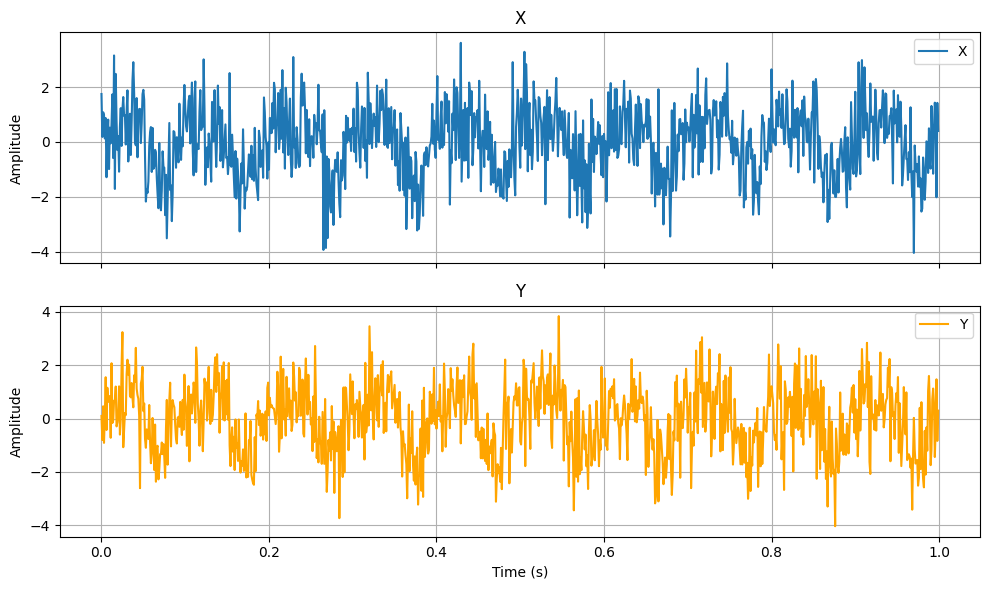

In [4]:

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(t, X, label='X')
axs[0].set_title('X')
axs[0].set_ylabel('Amplitude')
axs[0].grid()
axs[0].legend()

axs[1].plot(t, Y, label='Y', color='orange')
axs[1].set_title('Y')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
win = 10*srate #window size 